In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

In [12]:
data = 'data/mnist800.csv'
n_components = 2
n_neighbors = 10
n_obj = 10

In [13]:
df = pd.read_csv(data, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(800, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 4.8 MB
None


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_X = df.loc[:, '1x1':]
obj = df['label']
display(df_X.head())
print(obj.head())

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64


In [15]:
sc = StandardScaler()
X = sc.fit_transform(df_X) 

Text(0, 0.5, 'PCA2')

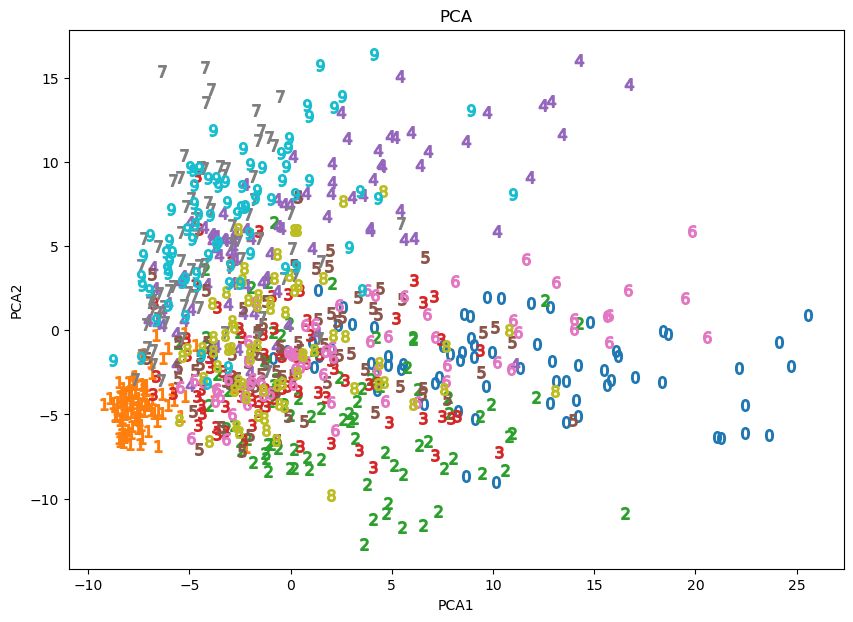

In [16]:
# PCA
n=X.shape[0]
Y = PCA(n_components=n_components).fit_transform(X*(np.sqrt(n-1))/(np.sqrt(n)))
plt.figure(figsize=(10,7))
plt.title("PCA")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0, 0.5, 'MDS2')

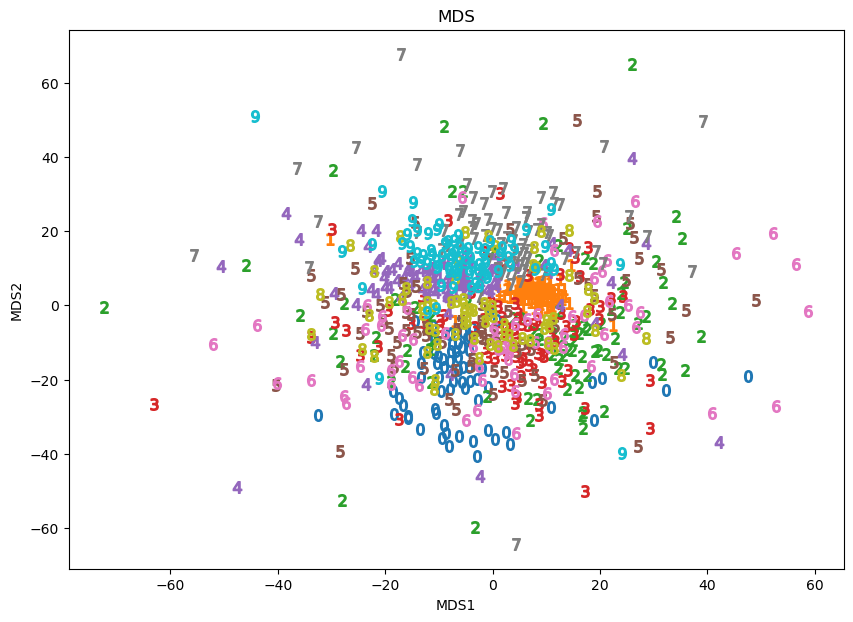

In [17]:
Y = MDS(n_components=n_components, random_state=30).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("MDS")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('MDS1')
plt.ylabel('MDS2')

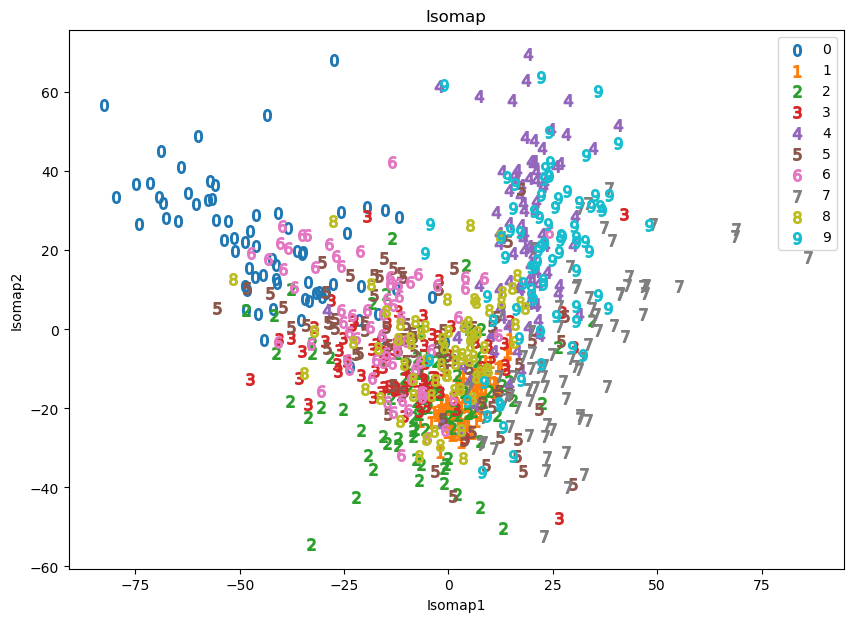

In [18]:
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("Isomap")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.legend()

Text(0, 0.5, 'LLE2')

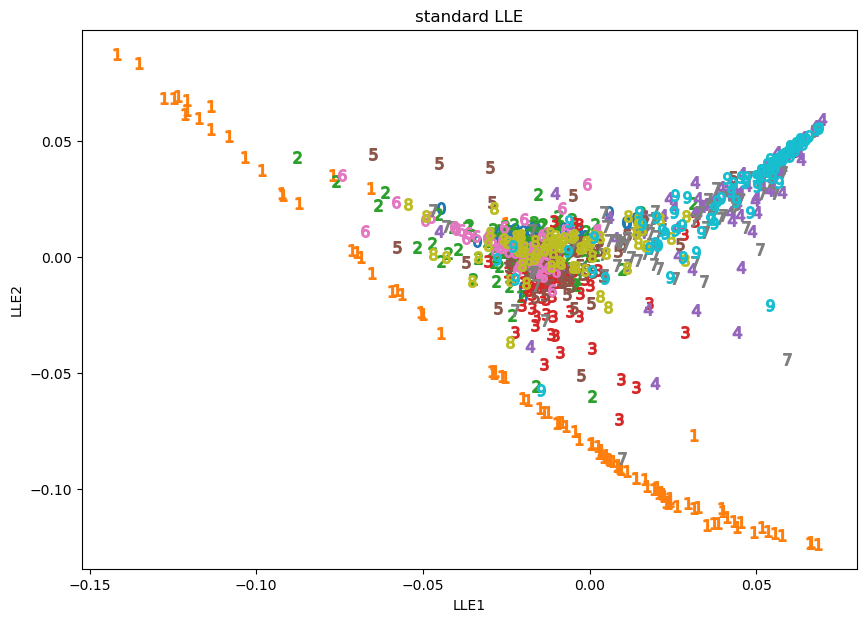

In [19]:
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard',
                           random_state=30).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("standard LLE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('LLE1')
plt.ylabel('LLE2')

Text(0, 0.5, 't-SNE2')

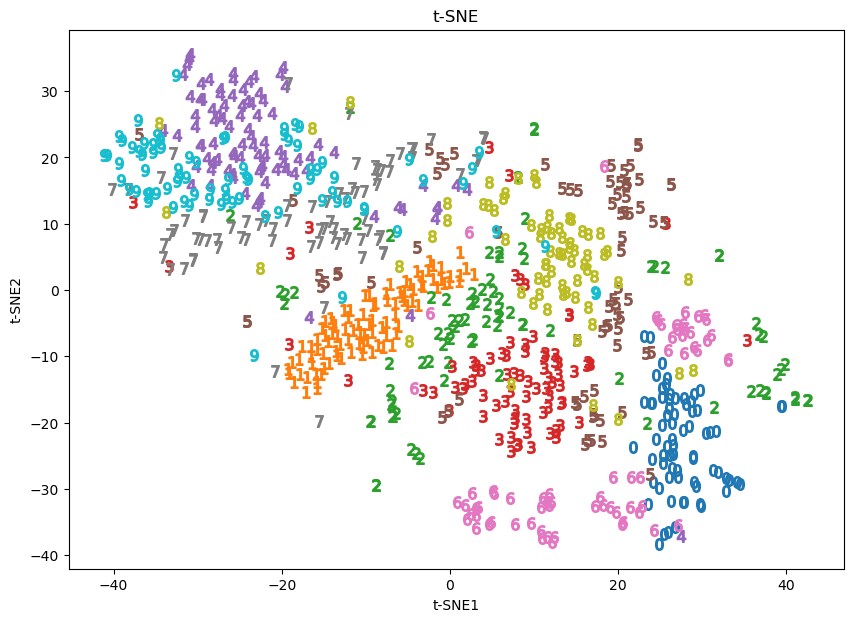

In [20]:
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=30).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("t-SNE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')